# Linear Regression

The code is obtained from a Udemy course (PyTorch: Deep Learning and Artificial Intelligence).

The code is also complementary to notes found in Obsidian.

In [418]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [419]:
# constants (model will try to predict these values)
N = 100
m = 0.5
b = -2

In [420]:
# generate random data of size N
X = np.random.random(N) * 10 - 5
# Y = m * X + b + np.random.randn(N) # Gaussian noise added to the Y values
Y = m * X + b

In [421]:
# find standard deviation of X and Y
X_std = X.std()
Y_std = Y.std()

# find mean of X and Y
X_mean = X.mean()
Y_mean = Y.mean()

# normalize X and Y
X = (X - X_mean) / X_std
Y = (Y - Y_mean) / Y_std

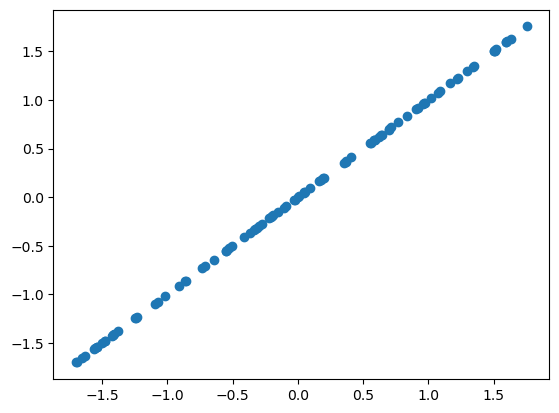

In [422]:
# plot the data
f = plt.scatter(X, Y)

In [423]:
# create a linear regression model
model = nn.Linear(1, 1)

# define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

In [424]:
test = np.random.random(10) * 10 - 5
print(test)

[-0.82961423  1.4556105  -0.97459138  4.40626168 -4.81047535  3.0860494
 -1.22047999  2.91102771  1.38249692  0.82483981]


In [425]:
test.reshape(2, 5)

array([[-0.82961423,  1.4556105 , -0.97459138,  4.40626168, -4.81047535],
       [ 3.0860494 , -1.22047999,  2.91102771,  1.38249692,  0.82483981]])

In [426]:
# reshape the data to be `num_samples` by `num_dimensions`
X = X.reshape(N, 1)
Y = Y.reshape(N, 1)

# cast the data type to float32 (PyTorch uses float32 by default; numpy uses float64)
inputs = torch.from_numpy(X.astype(np.float32)) # X = torch.from_numpy(X).type(torch.FloatTensor)
target = torch.from_numpy(Y.astype(np.float32)) # Y = torch.from_numpy(Y).type(torch.FloatTensor)

In [427]:
print("INPUTS:", type(inputs))
print("TARGET:", type(target))

INPUTS: <class 'torch.Tensor'>
TARGET: <class 'torch.Tensor'>


An example of `reshape` is shown below. It changes the dimensions of an array.

In [428]:
arr = np.random.random(10) * 100 - 50
print(arr)

[-25.65807015  -4.71376853  36.34834645  27.97854504 -31.65691051
  -4.93845666  21.34634799  24.97829197   8.41873123  -0.67897021]


Both `inputs` and `target` variables are of type `torch.Tensor`.

In [429]:
# train the model
num_epochs = 1000
losses = []
for it in range(num_epochs):
    # zero the parameter gradients
    optimizer.zero_grad()

    # forward pass
    outputs = model(inputs)
    loss = criterion(outputs, target)

    # store losses in an array for plotting
    losses.append(loss.item())

    # backward pass
    loss.backward()
    optimizer.step()

    # store gradients in an array for plotting
    w = model.weight.data.numpy()
    b = model.bias.data.numpy()
    print(f'Epoch {it + 1}/{num_epochs}, Loss: {loss.item():.4f}, Weight: {w}, Bias: {b}')

Epoch 1/1000, Loss: 1.8785, Weight: [[0.05235335]], Bias: [-0.9864005]
Epoch 2/1000, Loss: 1.8710, Weight: [[0.05424864]], Bias: [-0.9844277]
Epoch 3/1000, Loss: 1.8635, Weight: [[0.05614014]], Bias: [-0.98245883]
Epoch 4/1000, Loss: 1.8561, Weight: [[0.05802786]], Bias: [-0.9804939]
Epoch 5/1000, Loss: 1.8487, Weight: [[0.05991181]], Bias: [-0.9785329]
Epoch 6/1000, Loss: 1.8413, Weight: [[0.06179199]], Bias: [-0.97657585]
Epoch 7/1000, Loss: 1.8339, Weight: [[0.0636684]], Bias: [-0.9746227]
Epoch 8/1000, Loss: 1.8266, Weight: [[0.06554107]], Bias: [-0.9726735]
Epoch 9/1000, Loss: 1.8193, Weight: [[0.06740998]], Bias: [-0.9707281]
Epoch 10/1000, Loss: 1.8120, Weight: [[0.06927516]], Bias: [-0.96878666]
Epoch 11/1000, Loss: 1.8048, Weight: [[0.07113662]], Bias: [-0.9668491]
Epoch 12/1000, Loss: 1.7976, Weight: [[0.07299434]], Bias: [-0.9649154]
Epoch 13/1000, Loss: 1.7904, Weight: [[0.07484835]], Bias: [-0.9629856]
Epoch 14/1000, Loss: 1.7832, Weight: [[0.07669866]], Bias: [-0.96105963

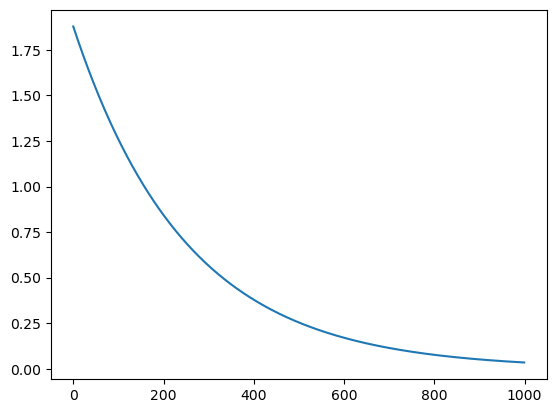

In [430]:
# plot the loss
plt.plot(losses)

A decreasing (fast start, slow end) curve is **ideal** when training machine learning models. 

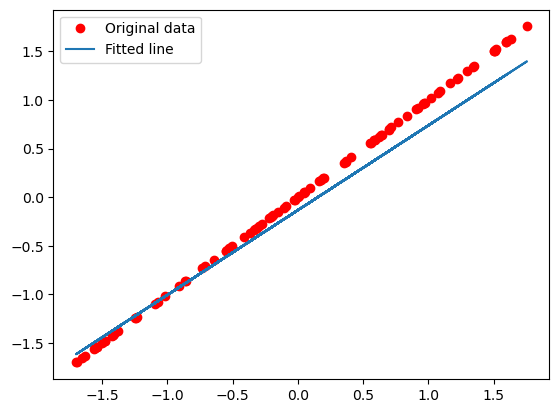

In [431]:
# prediction and plot
predicted = model(inputs).detach().numpy() # detach the tensor
plt.plot(X, Y, 'ro', label = 'Original data')
plt.plot(X, predicted, label = 'Fitted line')
plt.legend()
plt.show()

Alternative way to make predictions without gradients is shown below.

In [432]:
with torch.no_grad():
    out = model(inputs).numpy()
print(out, type(out))

[[ 1.2864854 ]
 [ 1.1765064 ]
 [ 0.04234068]
 [-1.6145    ]
 [ 1.3959043 ]
 [ 0.41998047]
 [-0.13321057]
 [-0.4940213 ]
 [ 0.59656096]
 [-0.05303453]
 [-0.61348146]
 [-1.3673258 ]
 [-0.32363355]
 [ 0.4277382 ]
 [-0.8846702 ]
 [ 0.02391733]
 [ 1.2619424 ]
 [-0.41865298]
 [ 0.7563562 ]
 [ 0.99644923]
 [ 0.7018034 ]
 [ 0.6661037 ]
 [-0.40786532]
 [-0.2962533 ]
 [ 0.88528323]
 [-1.5564712 ]
 [-1.4770095 ]
 [ 0.53734636]
 [-1.0702136 ]
 [ 1.0447768 ]
 [-1.2172911 ]
 [ 0.3544173 ]
 [-1.4177029 ]
 [-0.88173515]
 [ 1.1767799 ]
 [ 0.9371314 ]
 [-1.368041  ]
 [ 1.1830013 ]
 [ 1.2541261 ]
 [-0.42484793]
 [-1.0884095 ]
 [-0.39575416]
 [ 0.81719977]
 [ 0.3814792 ]
 [ 0.47600985]
 [-1.3580351 ]
 [ 1.0336757 ]
 [-1.207806  ]
 [ 0.17490435]
 [-0.26301646]
 [ 1.1907542 ]
 [ 0.7135458 ]
 [-0.15799953]
 [-0.7525103 ]
 [-0.5711565 ]
 [ 0.4913482 ]
 [ 0.37642974]
 [ 0.47256225]
 [ 0.926882  ]
 [ 0.18744388]
 [-0.6158633 ]
 [-0.15434688]
 [ 1.179794  ]
 [-1.3325784 ]
 [-0.6942328 ]
 [-1.493135  ]
 [ 0.18582

Inspect the parameters of the model to see if they match the original settings.
- slope `m` $\rightarrow$ weight `w`
- intercept `b` $\rightarrow$ bias `b`

In this example, the original weight and bias is already known.

In [433]:
w = model.weight.data.numpy()
b = model.bias.data.numpy()
print(w, b)

[[0.87175]] [-0.13349473]
